<a href="https://colab.research.google.com/github/skc02/Sabitri_INFO5502_Summer2022/blob/main/Copy_of_lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (07/26/2022 11:59'AM' - 07/29/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (10 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?


In [ ]:
# mount the drive for data files
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import all libraries and modules
import zipfile
import os
import numpy as np
from os import path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing




In [ ]:

extarctedZipDir = 'drive/MyDrive/Colab Notebooks/preprocessed_cases[cases_29404]'
dir_name = 'preprocessed_cases[cases_29404]'
file_count = 0
dict_cat = {}
categories_count = 0
#df = pd.DataFrame(["Directory Name","No Of Files Count"])
for dir in os.scandir(extarctedZipDir):
  categories_count = categories_count + 1
  file_count_in_dir = 0
  #print(dir.name)
  for file in os.listdir(extarctedZipDir+'/'+dir.name+'/'):
    #print(file)
    file_count_in_dir = file_count_in_dir + 1
  dict_cat[dir.name] = file_count_in_dir
  file_count = file_count + file_count_in_dir

df = pd.DataFrame(dict_cat.items(),columns=["Category","Documents#"]) 
print("Total Categories count = ",categories_count)
print("Documents under each category")
print(df)

Total Categories count =  76
Documents under each category
   Category  Documents#
0         1         775
1        10         584
2        11         605
3        12         275
4        13         458
..      ...         ...
71       76         177
72       77         146
73       78         242
74        8         521
75        9         744

[76 rows x 2 columns]


Question 2 (40 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

# Your answer here (code + explanation):








In [ ]:
# (1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element.
studentPerformanceURL ='https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab-assignment-04-student-performance.csv'
sp_df = pd.read_csv(studentPerformanceURL,index_col=False)
print(sp_df.info())
print(sp_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ge      131 non-null    object
 1   cst     131 non-null    object
 2   tnp     131 non-null    object
 3   twp     131 non-null    object
 4   iap     131 non-null    object
 5   esp     131 non-null    object
 6   arr     131 non-null    object
 7   ms      131 non-null    object
 8   ls      131 non-null    object
 9   as      131 non-null    object
 10  fmi     131 non-null    object
 11  fs      131 non-null    object
 12  fq      131 non-null    object
 13  mq      131 non-null    object
 14  fo      131 non-null    object
 15  mo      131 non-null    object
 16  nf      131 non-null    object
 17  sh      131 non-null    object
 18  ss      131 non-null    object
 19  me      131 non-null    object
 20  tt      131 non-null    object
 21  atd     131 non-null    object
dtypes: object(22)
memory usage

In [ ]:
#2) Visualize the count for each value in the 'Study Hours' column. 
#Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

dic_sh = dict(sp_df['sh'].value_counts())
df_sh = pd.DataFrame(dic_sh.items(), columns=['Study Hours', 'Count'])
print(df_sh)

  Study Hours  Count
0     Average     59
1        Poor     45
2        Good     27


Text(0.5, 1.0, 'Study Hours Group vs Count')

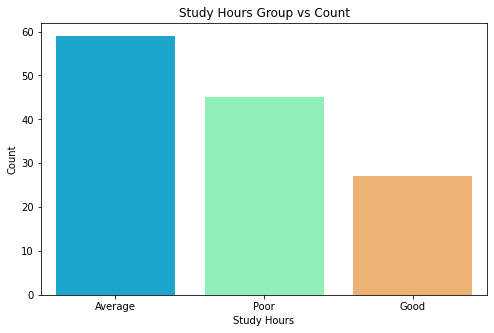

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Study Hours',y='Count',data=df_sh, palette='rainbow')
plt.title("Study Hours Group vs Count")

In [ ]:
#(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

# if percentage >=80 then Best If percentage >= 60 but less than 80 then Very Good If percentage >= 45 but less than 60 then Good If Percentage >= 30 but less than 45 then Pass If Percentage < 30 then Fail

dic_esp = dict(sp_df['esp'].value_counts())
df_esp = pd.DataFrame(dic_esp.items(), columns=['ESP', 'Count'])


In [ ]:
#define function to convert
def replace_esp(esp):
  r_n = 0.0
  #random.randrange(start,stop,step)
  #start inclusive, stop exclusive
  if esp == 'Best':
    r_n = random.randrange(80,101) #stop : exclusive
  elif esp == 'Very Good':
    r_n = random.randrange(60,80)
  elif esp == 'Good':
    r_n = random.randrange(45,60)
  elif esp == 'Pass':
    r_n = random.randrange(30,45)
  elif esp == 'Fail':
    r_n = random.randrange(1,30)
  return r_n 
#def end
#
df_sh_esp = pd.DataFrame()
df_sh_esp['sh'] = sp_df['sh']#student hour
df_sh_esp['esp'] = sp_df['esp']#end semester percentage
for ind in df_sh_esp.index:
  df_sh_esp['esp'][ind] = replace_esp(df_sh_esp['esp'][ind])


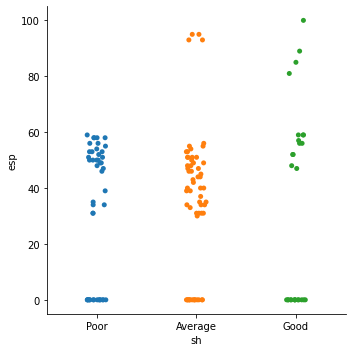

In [ ]:
sns.catplot(x ='sh', y ='esp', data = df_sh_esp)#factorplot is renamed as catplot 
plt.show()

In [ ]:
# (4) Get the correlation from the data, then plug it to heatmap function and show it as following:
def replace_sh(sh):
  r_n = 0.0
  #random.randrange(start,stop,step)
  #start inclusive, stop exclusive
  if sh == 'Average':
    r_n = random.randrange(4,6) #stop : exclusive
  elif sh == 'Poor':
    r_n = random.randrange(2,4)
  elif sh == 'Good':
    r_n = random.randrange(6,None)
  return r_n 

corr_sh_esp = pd.DataFrame()
corr_sh_esp['sh'] = sp_df['sh']#student hour
corr_sh_esp['esp'] = df_sh_esp['esp']#end semester percentage
for ind in corr_sh_esp.index:
  corr_sh_esp['sh'][ind] = replace_sh(corr_sh_esp['sh'][ind])

print(corr_sh_esp.describe())



         sh    esp
count   131  131.0
unique    6   33.0
top       4    0.0
freq     45   42.0


In [ ]:
cols = ['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi','fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd']
# Encode labels of multiple columns at once
df_encoded = sp_df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df_encoded.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,0,0,1,1,3,1,1,0,1,1,...,5,0,1,1,1,2,0,0,2,1
1,1,2,3,3,3,3,0,0,1,1,...,5,3,4,4,2,2,0,0,0,0
2,0,2,1,1,3,1,0,0,1,1,...,1,0,4,1,0,0,0,0,1,1
3,1,1,2,1,3,1,0,0,1,1,...,1,5,0,0,1,2,0,0,0,0
4,1,0,1,1,3,3,0,0,1,1,...,0,1,4,1,1,2,1,0,2,1


In [ ]:
# let's drop the column 'ms', since all the values are 0
df_final = df_encoded.drop('ms', axis = 1)



In [ ]:
correlation=df_final.corr()
correlation

,ge,cst,tnp,twp,iap,esp,arr,ls,as,fmi,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
ge,1.000000,-0.016977,0.006935,-0.094917,-0.053492,0.069780,0.027204,0.014600,-0.055056,0.008516,...,0.104596,0.248325,0.057232,-0.007515,-0.204366,-0.109366,0.100451,-0.098054,-0.153508,0.071129
cst,-0.016977,1.000000,0.006437,0.024047,0.040369,0.140074,0.138537,0.256753,0.056416,-0.064641,...,0.059259,0.145255,0.089111,0.074388,0.067923,-0.039874,-0.057139,0.052862,-0.118295,0.117910
tnp,0.006935,0.006437,1.000000,0.269661,0.098675,0.293045,0.012580,0.093466,0.122533,0.080136,...,-0.092653,-0.030852,0.052263,0.059009,0.097854,0.016424,-0.001577,-0.001765,-0.125240,-0.039046
twp,-0.094917,0.024047,0.269661,1.000000,0.108756,0.265710,-0.104224,0.030679,-0.048394,-0.009892,...,-0.084678,-0.140976,-0.080505,0.224947,-0.032935,0.059880,0.025208,0.005859,0.105384,-0.090624
iap,-0.053492,0.040369,0.098675,0.108756,1.000000,0.333076,0.035553,0.144850,0.050701,0.035649,...,-0.008221,-0.005143,-0.091324,0.014454,0.139953,0.092307,-0.002621,0.025241,0.105921,-0.085863
esp,0.069780,0.140074,0.293045,0.265710,0.333076,1.000000,0.085867,0.184471,0.148154,0.045524,...,-0.021203,-0.039767,0.058970,0.047507,0.087892,0.017952,0.009439,0.010564,-0.072989,-0.096510
arr,0.027204,0.138537,0.012580,-0.104224,0.035553,0.085867,1.000000,0.128527,-0.181143,0.043914,...,0.115805,0.068089,-0.005274,-0.066153,-0.078630,-0.093818,-0.073728,-0.123966,-0.154324,0.056276
ls,0.014600,0.256753,0.093466,0.030679,0.144850,0.184471,0.128527,1.000000,-0.080306,0.063151,...,0.141975,0.154954,-0.029701,0.049060,-0.042200,-0.154153,-0.075818,-0.239277,-0.209410,0.097645
as,-0.055056,0.056416,0.122533,-0.048394,0.050701,0.148154,-0.181143,-0.080306,1.000000,-0.164794,...,-0.219669,-0.170659,0.221889,-0.045719,0.094952,0.229447,0.060246,0.330530,0.162425,0.062961
fmi,0.008516,-0.064641,0.080136,-0.009892,0.035649,0.045524,0.043914,0.063151,-0.164794,1.000000,...,0.019720,-0.078210,-0.008806,-0.127578,0.021164,0.099858,0.002200,-0.134687,-0.167317,0.039566


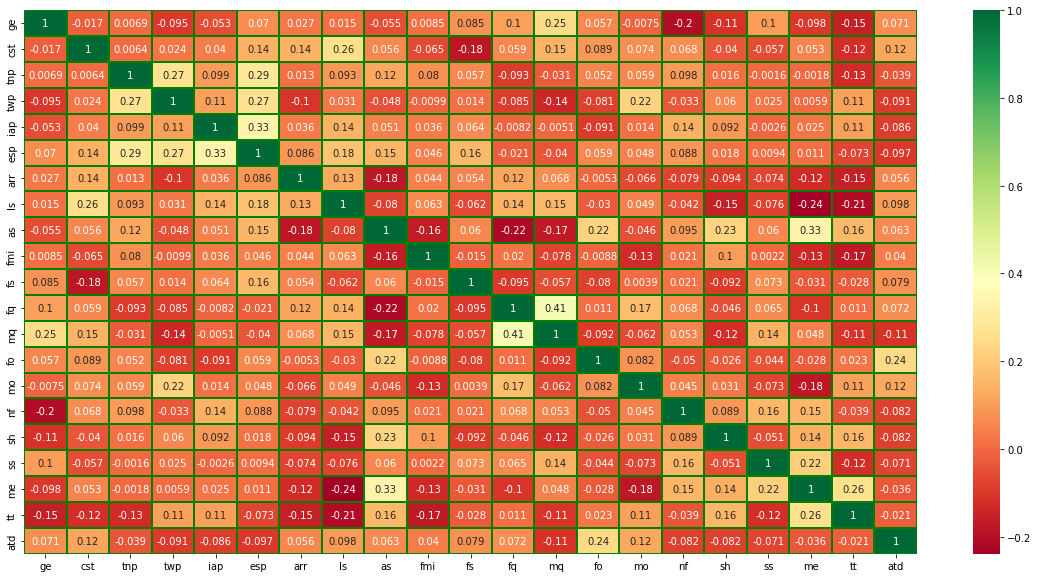

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_final.corr(), cmap='RdYlGn',annot=True, linecolor='Green', linewidths=1.0)
plt.show()